In [ ]:
!pip -q install qpsolvers[open_source_solvers]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.9/959.9 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 kB 41.6 MB/s eta 0:00:00


In [ ]:
!pip install -q pyomo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00


In [ ]:
from qpsolvers import solve_qp

In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
int_rate = pd.read_csv('Lab08_InterestRate.csv')

In [ ]:
#Answer1
D = [[1],[int_rate.iloc[0,2]],[int_rate.iloc[0,3]]]
D

[[1], [0.3615], [85.6]]

In [ ]:
D_tran = np.transpose(D)
P = D*D_tran
r = int_rate.iloc[0,1]
q = np.multiply(D,-2*r)
q

array([[-0.0832   ],
       [-0.0300768],
       [-7.12192  ]])

In [ ]:
i=0
P=[[0,0,0],[0,0,0],[0,0,0]]
q=[[0],[0],[0]]
for i in range(20):
  D = [[1],[int_rate.iloc[i,2]],[int_rate.iloc[i,3]]]
  D_tran = np.transpose(D)
  p = (D)*(D_tran)
  r = int_rate.iloc[i,1]
  qu = np.multiply(D,-2*r)
  P = P + p
  q = q + qu

P= np.multiply(P,2)
print(P)
print(q)


[[4.00000000e+01 1.81496000e+01 3.35400000e+03]
 [1.81496000e+01 9.25515268e+00 1.49040692e+03]
 [3.35400000e+03 1.49040692e+03 2.83313880e+05]]
[[  -1.635     ]
 [  -0.77927632]
 [-134.82612   ]]


In [ ]:
x=solve_qp(P, q, None, None, None, None, None, None, solver = "osqp")
x

array([ 0.12237613,  0.00576031, -0.00100316])

In [ ]:
rf=[]
for i in range(20):
  Ra = np.array([1,int_rate.iloc[i,2],int_rate.iloc[i,3]])
  r = np.matmul(Ra,x)
  rf.append(r)
print(rf)
print(x)



[0.03858826079811187, 0.03181042835378389, 0.03472871326461463, 0.03391538785180524, 0.03786473789597443, 0.049982342581879086, 0.046214155494765985, 0.05174534259877561, 0.04150286103922274, 0.04187120370481549, 0.03719668653869093, 0.029804863367602574, 0.03137575583831592, 0.029935363553803884, 0.034803769863696044, 0.04992047636957979, 0.05170643134263811, 0.05591335353090378, 0.04397702604389504, 0.04464516368528433]
[ 0.12237613  0.00576031 -0.00100316]


In [ ]:
ForecastedIntRate=rf
ActualRate=[]
for i in range(20):
  Act_Rat=int_rate.iloc[i,1]
  ActualRate.append(Act_Rat)
x=np.linspace(2003,1,2023)
print(ActualRate)
print(ForecastedIntRate)
print(x)

[0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507, 0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504, 0.0478, 0.0549, 0.0468, 0.0478]
[0.03858826079811187, 0.03181042835378389, 0.03472871326461463, 0.03391538785180524, 0.03786473789597443, 0.049982342581879086, 0.046214155494765985, 0.05174534259877561, 0.04150286103922274, 0.04187120370481549, 0.03719668653869093, 0.029804863367602574, 0.03137575583831592, 0.029935363553803884, 0.034803769863696044, 0.04992047636957979, 0.05170643134263811, 0.05591335353090378, 0.04397702604389504, 0.04464516368528433]
[2.00300000e+03 2.00200989e+03 2.00101978e+03 ... 2.98021761e+00
 1.99010880e+00 1.00000000e+00]


In [ ]:
ForecastedIntRate=rf
ActualRate=[]
for i in range(20):
  Act_Rat=int_rate.iloc[i,1]
  ActualRate.append(Act_Rat)
x=np.linspace(2003,1,2023)
print(ActualRate)
print(ForecastedIntRate)
print(x)

[0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507, 0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504, 0.0478, 0.0549, 0.0468, 0.0478]
[0.03858826079811187, 0.03181042835378389, 0.03472871326461463, 0.03391538785180524, 0.03786473789597443, 0.049982342581879086, 0.046214155494765985, 0.05174534259877561, 0.04150286103922274, 0.04187120370481549, 0.03719668653869093, 0.029804863367602574, 0.03137575583831592, 0.029935363553803884, 0.034803769863696044, 0.04992047636957979, 0.05170643134263811, 0.05591335353090378, 0.04397702604389504, 0.04464516368528433]
[2.00300000e+03 2.00200989e+03 2.00101978e+03 ... 2.98021761e+00
 1.99010880e+00 1.00000000e+00]


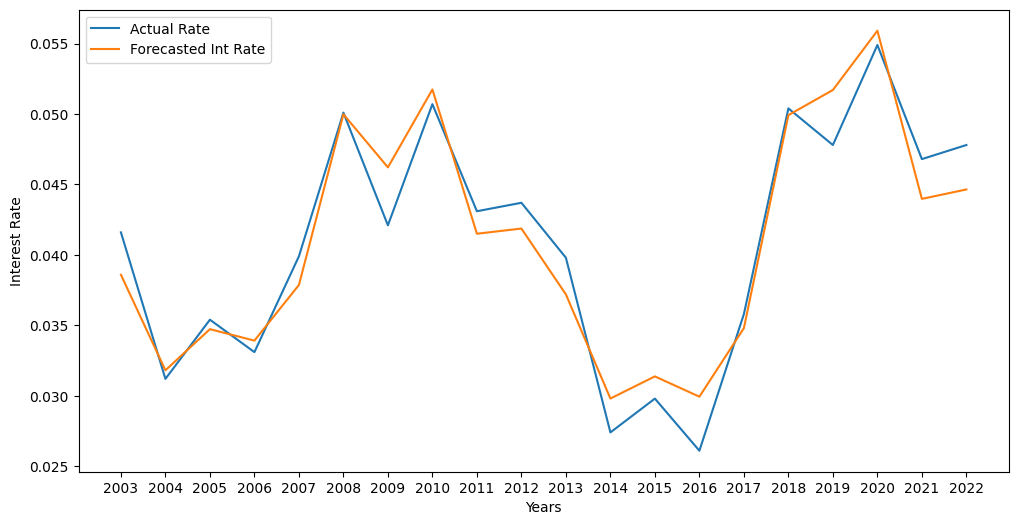

In [ ]:
plt.figure(figsize=(12,6))
x=np.linspace(2003,2022,20)

plt.xticks(x)

plt.plot(x,ActualRate, label='Actual Rate')
plt.plot(x,ForecastedIntRate, label='Forecasted Int Rate')

plt.xlabel('Years')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()

In [ ]:
#Answer2
P=np.array([[12.982, 0, 0, 0],
            [0, 2.4, 0, 0],
            [0, 0, 0.44, -0.051],
            [0, 0, -0.051, 0.068]])
q=np.array([-6748, -1184, -420.625, -70.41])
G=np.array([[-25.964, -96, -7.08, 0.025],
            [-58.419, -2.4, -5.56, 17.39],
            [1, 0, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 0.22, -0.025],
            [0, 0, -0.026, 0.034]])
h=np.array([59861805, 74921464, 1039.59, 986.66, 420.625, 70.41 ])
p=solve_qp(P, q, G, h, None, None, None, None, solver = "osqp")
p

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted G to scipy.sparse.csc.csc_matrix
For best performance, build G as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(


array([ 519.79724844,  493.33324177, 1178.42665294, 1919.26152999])